In [1]:
# LOADING DATA AND PREPROCESSING

# STEP 1 - IMPORTING THE LIBRARIES

# For matrix calculations and Data Management
import numpy as np

In [3]:
#Importing libraries required for the model
import tensorflow as tf
import keras
import keras.backend as K

In [2]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [5]:
#for plotting charts used for data visualizations
import matplotlib.pyplot as plt

In [7]:
#Libtraries for Locating and loading data
import glob
from PIL import Image 
import os
from os import listdir

In [8]:
import zipfile
with zipfile.ZipFile('augmented data.zip') as zf:
  zf.extractall()

In [9]:
ls

'augmented data'/  'augmented data.zip'   sample_data/


In [10]:
dirName=(r"/content/augmented data")
folders=listdir(dirName)

In [11]:
# Getting the names for all the folders containing the data
def getListOfFiles(dirName):
  #create a list of sub directories and files (if any)
  #names in the given directory
  listOfFile=os.listdir(dirName)
  allFiles=list()
  for fol_name in listOfFile:
    fullPath=os.path.join(dirName, fol_name)
    allFiles.append(fullPath)
  return allFiles

In [12]:
Folders=getListOfFiles(dirName)
len(Folders)
subfolders=[]
for num in range(len(Folders)):
  sub_fols=getListOfFiles(Folders[num])
  subfolders+=sub_fols
# Now the subfolders contains the address to all our data folders for each class
subfolders

['/content/augmented data/Mammal/Pangolin_AUG',
 '/content/augmented data/Mammal/SW_Deer_AUG',
 '/content/augmented data/Bird/SBS_AUG',
 '/content/augmented data/Bird/GIB_AUG',
 '/content/augmented data/Flower/LS_Orchid_AUG',
 '/content/augmented data/Flower/Corpse_AUG']

In [13]:
# STEP 2(i)- LOADING THE IMAGES INTO THE MACHINE UNDERSTANDABLE DATA
# Loading the data and preprocessing it to make it in trainable format
# X data includes the data generated for each image 
# Y data includes ID No, unique for every different species, so we have 6 classes which will the label
X_data=[]
Y_data=[]
id_no=0

# to make a list of tuples, where we'll store the info about the image, category and species
found=[]

# STEP 2(i)- LOADING THE IMAGES INTO THE MACHINE UNDERSTANDABLE DATA
# Loading the data and preprocessing it to make it in trainable format
# X data includes the data generated for each image 
# Y data includes ID No, unique for every different species, so we have 6 classes therefore, we will get 6 ids=[0,1,2,3,4,5], that will be the label we're classifying

#X_data=[images1,images2,images3,images4,images5,images6,images7,images8,images9,images10,images11,images12]
#Y_data=[0,1,2,3,4,5,6,7,8,9,10,11] //if both augmented data along with the non-augmented datas are considered 
#X_data=[images7,images8,images9,images10,images11,images12]
#Y_data=[0,1,2,3,4,5]
#id_no=0

# to make a list of tuples, where we'll store the info about the image, category and species
#found=[]

In [14]:
# iterating in all folders under Augmneted data folder
for paths in subfolders:
  # set folder path for each unique class and category
  files=glob.glob(paths + "/*.jpg") #(paths, "\*.jpg", recursive=True)
  # adding tuples to the list that contains folder name and subfolder name
  found.append((paths.split('/')[-2], paths.split('/')[-1])) #1st backward slash and then forward slash, so execute it again (\/) \ a special character to escape windows
  # iterating all the files under the folder one by one
  for myFile in files:
    img=Image.open(myFile)
    img=img.resize((224,224), Image.ANTIALIAS) #resizes image without ratio
    # converts the image to numpy arrays
    img=np.array(img)
    if img.shape==(224,224,3): 
      # add the numpy images to the matrix with all the data
      X_data.append(img)
      Y_data.append(id_no)
  id_no+=1

In [15]:
print(found)

[('Mammal', 'Pangolin_AUG'), ('Mammal', 'SW_Deer_AUG'), ('Bird', 'SBS_AUG'), ('Bird', 'GIB_AUG'), ('Flower', 'LS_Orchid_AUG'), ('Flower', 'Corpse_AUG')]


In [16]:
# STEP 2(ii) - DATA SPLITTING INTO THE TRAIN AND TEST to see our data 
print(X_data)
print(Y_data)

[array([[[124, 144, 117],
        [123, 143, 116],
        [138, 158, 129],
        ...,
        [ 54,  78,  48],
        [ 59,  86,  50],
        [ 58,  83,  49]],

       [[111, 131, 104],
        [109, 129, 102],
        [118, 138, 109],
        ...,
        [ 56,  80,  50],
        [ 61,  89,  53],
        [ 57,  83,  48]],

       [[ 81, 101,  74],
        [ 78,  99,  71],
        [ 82, 103,  72],
        ...,
        [ 64,  87,  57],
        [ 70,  96,  60],
        [ 61,  87,  51]],

       ...,

       [[192, 180, 139],
        [192, 178, 137],
        [198, 182, 142],
        ...,
        [125,  81,  63],
        [181, 130,  95],
        [213, 162, 132]],

       [[196, 174, 126],
        [176, 152, 104],
        [168, 142,  97],
        ...,
        [169, 120,  66],
        [216, 164, 108],
        [229, 178, 122]],

       [[223, 203, 156],
        [199, 178, 131],
        [185, 160, 115],
        ...,
        [195, 146,  97],
        [240, 188, 134],
        [255, 205, 153]

In [17]:
# Converting lists to np arrays again
X=np.array(X_data)
Y=np.array(Y_data)

In [18]:
X

array([[[[124, 144, 117],
         [123, 143, 116],
         [138, 158, 129],
         ...,
         [ 54,  78,  48],
         [ 59,  86,  50],
         [ 58,  83,  49]],

        [[111, 131, 104],
         [109, 129, 102],
         [118, 138, 109],
         ...,
         [ 56,  80,  50],
         [ 61,  89,  53],
         [ 57,  83,  48]],

        [[ 81, 101,  74],
         [ 78,  99,  71],
         [ 82, 103,  72],
         ...,
         [ 64,  87,  57],
         [ 70,  96,  60],
         [ 61,  87,  51]],

        ...,

        [[192, 180, 139],
         [192, 178, 137],
         [198, 182, 142],
         ...,
         [125,  81,  63],
         [181, 130,  95],
         [213, 162, 132]],

        [[196, 174, 126],
         [176, 152, 104],
         [168, 142,  97],
         ...,
         [169, 120,  66],
         [216, 164, 108],
         [229, 178, 122]],

        [[223, 203, 156],
         [199, 178, 131],
         [185, 160, 115],
         ...,
         [195, 146,  97],
        

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
# Print the shapes to see if they are correct
print("x-shape",X.shape,"y shape",Y.shape)

x-shape (1000, 224, 224, 3) y shape (1000,)


In [21]:
X=X.astype('float32')/255.0

In [22]:
# keras library offers a function called to_categorical() or OneHotEncoder integer data. 
# The sequence has an example of all known values so we use the to_categorical() function directly
y_cat=to_categorical(Y_data,len(subfolders))

In [23]:
print("X shape",X,"y_cat shape",y_cat)

X shape [[[[0.4862745  0.5647059  0.45882353]
   [0.48235294 0.56078434 0.45490196]
   [0.5411765  0.61960787 0.5058824 ]
   ...
   [0.21176471 0.30588236 0.1882353 ]
   [0.23137255 0.3372549  0.19607843]
   [0.22745098 0.3254902  0.19215687]]

  [[0.43529412 0.5137255  0.40784314]
   [0.42745098 0.5058824  0.4       ]
   [0.4627451  0.5411765  0.42745098]
   ...
   [0.21960784 0.3137255  0.19607843]
   [0.23921569 0.34901962 0.20784314]
   [0.22352941 0.3254902  0.1882353 ]]

  [[0.31764707 0.39607844 0.2901961 ]
   [0.30588236 0.3882353  0.2784314 ]
   [0.32156864 0.40392157 0.28235295]
   ...
   [0.2509804  0.34117648 0.22352941]
   [0.27450982 0.3764706  0.23529412]
   [0.23921569 0.34117648 0.2       ]]

  ...

  [[0.7529412  0.7058824  0.54509807]
   [0.7529412  0.69803923 0.5372549 ]
   [0.7764706  0.7137255  0.5568628 ]
   ...
   [0.49019608 0.31764707 0.24705882]
   [0.70980394 0.50980395 0.37254903]
   [0.8352941  0.63529414 0.5176471 ]]

  [[0.76862746 0.68235296 0.49411765]

In [24]:
print("X shape",X.shape,"y_cat shape", y_cat.shape)

X shape (1000, 224, 224, 3) y_cat shape (1000, 6)


In [25]:
# Splitting the data to Test and Train

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.2)

In [27]:
print("The model has" + str(len(X_train)) + "inputs")

The model has800inputs


In [28]:
print("The model has" + str(len(X_test)) + "inputs")
print("The model has" + str(len(y_train)) + "inputs")
print("The model has" + str(len(y_test)) + "inputs")

The model has200inputs
The model has800inputs
The model has200inputs


In [29]:
 # STEP 3 - BUILDING A CONVOLUTION NEURAL NETWORKS

    # MODEL BUILDING
                    
# STEP 3(i) - Sequential
                    
early_stop_loss=EarlyStopping(monitor='loss',patience=3,verbose=1)
early_stop_val_acc=EarlyStopping(monitor='val_accuracy',patience=3,verbose=1)
model_callbacks=[early_stop_loss,early_stop_val_acc]

In [30]:
# STEP 3(ii) ADDING LAYERS (Conv, Maxpool, Flatten, Dense, Dropout)
                    
# defining our model, All the layers and configurations
                    
def load_CNN(output_size):
  K.clear_session()
  model=Sequential()
  model.add(Dropout(0.4,input_shape=(224,224,3)))
  model.add(Conv2D(256,(5,5),input_shape=(224, 224, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  
  #model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  #model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  #model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(output_size, activation='softmax'))
  return model

In [31]:
# STEP 4- BUILDING MODEL SUMMARY

# STEP 4(i) - Building a model based on the above defined function

In [32]:
model=load_CNN(6) # Number of Columns/ Outputs

In [33]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [34]:
model.summary() # to print the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        7

In [35]:
weights=model.get_weights() # to get the weights from the created model

In [36]:
weights

[array([[[[-2.35325433e-02, -2.97288671e-02,  2.29723677e-02, ...,
            1.33388080e-02,  1.59472115e-02,  1.23035200e-02],
          [ 5.21360338e-03,  2.34906301e-02, -3.03867739e-02, ...,
            8.09293613e-03,  1.51144639e-02,  2.32037939e-02],
          [ 6.63539022e-03,  6.87961653e-03, -2.15535574e-02, ...,
            4.88099083e-03,  1.13010854e-02,  1.03018805e-02]],
 
         [[-8.26654769e-03, -2.49057077e-03,  2.22262889e-02, ...,
           -2.66802497e-02,  8.97950307e-03,  9.10864398e-03],
          [-1.32768136e-02,  1.94658712e-03, -2.42993571e-02, ...,
            2.58219168e-02, -1.16409753e-02,  1.13716573e-02],
          [ 4.30937856e-03, -2.50070933e-02,  2.18319669e-02, ...,
            4.32705134e-03,  1.33866780e-02,  1.19621418e-02]],
 
         [[-6.35759719e-03, -8.94039124e-03,  2.54226662e-02, ...,
           -1.11674890e-03, -2.60926988e-02,  1.29959360e-02],
          [-1.93019882e-02,  1.10735856e-02, -2.34123990e-02, ...,
            2.266

In [37]:
# STEP 4(ii) - FITTING THE MODEL
# Fitting the model on different batch sizes to see which onees turns out to be the best
# some arrays to store the result of each model (model trained on each bath size)

In [38]:
histories_acc=[]

In [39]:
histories_val_acc=[]

In [40]:
histories_loss=[]

In [41]:
histories_val_loss=[]

In [42]:
model.set_weights(weights)

In [43]:
h=model.fit(X_train,y_train,batch_size=16,epochs=7,verbose=1,callbacks=[early_stop_loss],shuffle=True,validation_data=(X_test, y_test))

Epoch 1/7
50/50 [==============================] - 533s 11s/step - loss: 1.8544 - accuracy: 0.2000 - val_loss: 1.7661 - val_accuracy: 0.2100
Epoch 2/7
50/50 [==============================] - 524s 11s/step - loss: 1.6955 - accuracy: 0.2250 - val_loss: 1.5808 - val_accuracy: 0.4600
Epoch 3/7
50/50 [==============================] - 517s 10s/step - loss: 1.4942 - accuracy: 0.3925 - val_loss: 1.5873 - val_accuracy: 0.3500
Epoch 4/7
50/50 [==============================] - 522s 10s/step - loss: 1.2235 - accuracy: 0.5450 - val_loss: 1.1507 - val_accuracy: 0.5600
Epoch 5/7
50/50 [==============================] - 520s 10s/step - loss: 0.7629 - accuracy: 0.7088 - val_loss: 0.9826 - val_accuracy: 0.6500
Epoch 6/7
50/50 [==============================] - 530s 11s/step - loss: 0.4185 - accuracy: 0.8737 - val_loss: 0.9658 - val_accuracy: 0.7200
Epoch 7/7
50/50 [==============================] - 526s 11s/step - loss: 0.2459 - accuracy: 0.9287 - val_loss: 0.8352 - val_accuracy: 0.7450


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        7

In [45]:
# STEP 5 - EVALUATION: (i) ACCURACY

In [46]:
# Printing the keys we have for the stores values
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [48]:
# Appending the data for each epochh in an arr and for each batch size

In [47]:
histories_acc.append(h.history['accuracy'])

In [49]:
histories_val_acc.append(h.history['val_accuracy'])

In [50]:
histories_loss.append(h.history['loss'])

In [51]:
histories_val_loss.append(h.history['val_loss'])

In [52]:
# Converting into numpy arrays

In [53]:
histories_acc=np.array(histories_acc)

In [54]:
histories_val_acc=np.array(histories_val_acc)

In [55]:
histories_loss=np.array(histories_loss)

In [56]:
histories_val_loss=np.array(histories_val_loss)

In [57]:
# Here we have 3 columns and 6 rows each, ever row represents different batch sizes and every coloumn represents different epoch scores
print('histories_acc',histories_acc,
      'histories_loss',histories_loss,
      'histories_val_acc',histories_val_acc,
      'histories_val_loss',histories_val_loss)

histories_acc [[0.2        0.22499999 0.39250001 0.54500002 0.70875001 0.87374997
  0.92874998]] histories_loss [[1.85436261 1.69547832 1.49424255 1.22351491 0.7628662  0.41848424
  0.24587704]] histories_val_acc [[0.20999999 0.46000001 0.34999999 0.56       0.64999998 0.72000003
  0.745     ]] histories_val_loss [[1.76614487 1.5808053  1.58734071 1.15073574 0.98262668 0.96584833
  0.83519274]]


115


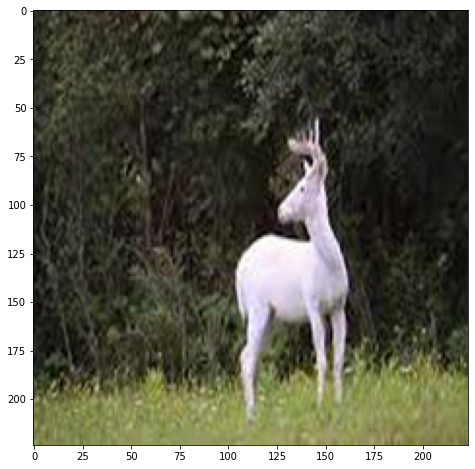

In [58]:
# Loading the test data
image_number =np.random.randint(0,len(X_test))
print(image_number)

# Plotting the test image
plt.figure(figsize=(8,8))
plt.imshow(X_test[image_number])

In [59]:
# PREDICTION
# STEP 5(ii) - LOADING A TEST IMAGE AND MAKING A TEST PREDICTION
                    
# Predicting the image's classes
# Individual scores for each calss as well as class with the highest score is printed 
# Making predictions, storing teh result as an array of probabilities of each class predicted
                    
predictions=model.predict([X_test[image_number].reshape(1,224,224,3)])

1/1 [==============================] - 0s 302ms/step


In [60]:
for idx, result, x in zip(range(0,6),found, predictions[0]):
  print("Label: {}, Type : {}, Species : {}, Score : {}%".format(idx,result[0],result[1], round(x*100,3)))

Label: 0, Type : Mammal, Species : Pangolin_AUG, Score : 98.579%
Label: 1, Type : Mammal, Species : SW_Deer_AUG, Score : 1.227%
Label: 2, Type : Bird, Species : SBS_AUG, Score : 0.02%
Label: 3, Type : Bird, Species : GIB_AUG, Score : 0.114%
Label: 4, Type : Flower, Species : LS_Orchid_AUG, Score : 0.009%
Label: 5, Type : Flower, Species : Corpse_AUG, Score : 0.051%


In [61]:
#predictiong the class with max probabilty
#ClassIndex=model.predict([X_test[image_number].reshape(1,224,224,3)])
ClassIndex=np.argmax(model.predict([X_test[image_number].reshape(1,224,224,3)]), axis=-1)
#getting the index of th eclass which we can pass to the boat_types list to get the boat type name
ClassIndex
#printing the final output
print(found[ClassIndex[0]])

1/1 [==============================] - 0s 234ms/step
('Mammal', 'Pangolin_AUG')


In [62]:
# STEP 6 - SAVE THE MODEL

In [63]:
model_json=model.to_json() #indent=2

In [64]:
with open("final_model.json","w") as json_file:
  json_file.write(model_json)

In [65]:
# serializing the weights to H5
    
model.save_weights("final_model.h5")
print("Saved model to disk")

Saved model to disk


In [66]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

In [67]:
# load json and create model
json_file = open('final_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [68]:
# load weights into new model
loaded_model.load_weights("final_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [69]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#loaded_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

7/7 [==============================] - 47s 7s/step - loss: 0.4690 - accuracy: 0.7450
accuracy: 74.50%
